# Task 5: Classification Tasks Overview

In [11]:
import pandas as pd
import numpy as np

# Create a sample dataset
np.random.seed(42)  # For reproducibility
data = {
    'Study Hours': np.random.randint(1, 20, size=100),  # Random study hours between 1 and 20
    'Attendance': np.random.uniform(50, 100, size=100),  # Random attendance percentage between 50 and 100
}

# Create a binary Pass/Fail column based on a simple rule
data['Pass'] = np.where((data['Study Hours'] >= 10) & (data['Attendance'] >= 75), 1, 0)

# Convert to DataFrame
student_data = pd.DataFrame(data)

# Save to CSV
student_data.to_csv('student_data.csv', index=False)
print(student_data.head())

   Study Hours  Attendance  Pass
0            7   63.736090     0
1           15   78.062171     1
2           11   69.146344     0
3            8   98.585605     0
4            7   92.445691     0


Study Hours    0
Attendance     0
Pass           0
dtype: int64


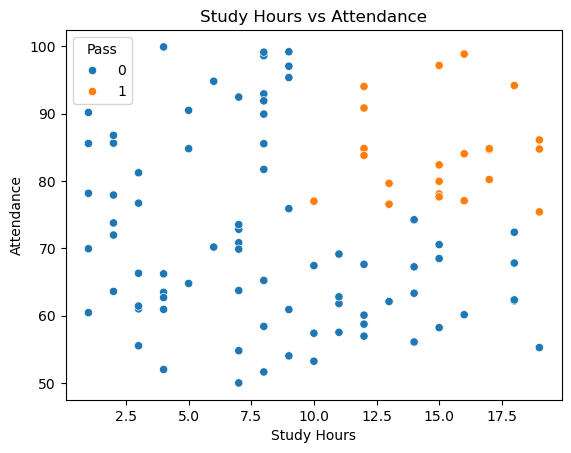

Accuracy: 1.0
Confusion Matrix:
[[14  0]
 [ 0  6]]


['student_pass_fail_model.pkl']

In [13]:
# Load the dataset
data = pd.read_csv('student_data.csv')

# Data Exploration
print(data.isnull().sum())
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='Study Hours', y='Attendance', hue='Pass', data=data)
plt.title('Study Hours vs Attendance')
plt.show()

# Model Training
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = data[['Study Hours', 'Attendance']]
y = data['Pass']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

# Model Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)

# Save the model
import joblib
joblib.dump(model, 'student_pass_fail_model.pkl')

# Task 2: Sentiment Analysis with Natural Language Processing 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Jayesh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Jayesh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Jayesh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Dataset Head:
                                                 Text     Label
0  The impact of educational reforms remains unce...  positive
1  Critics argue that recent improvements in the ...  negative
2  Innovative teaching methods have led to unexpe...  positive
3  Despite budget constraints, the school has man...  positive
4  The true effectiveness of online learning plat...  negative
Dataset Columns:
 Index(['Text', 'Label'], dtype='object')
Sentiment Analysis Accuracy: 0.45454545454545453
Confusion Matrix:
 [[4 0]
 [6 1]]
Classification Report:
               precision    recall  f1-score   support

           0       0.40      1.00      0.57         4
           1       1.00      0.14      0.25         7

    accuracy                           0.45        11
   macro avg       0.70      0.57      0.41        11
weighted avg       0.78      0.45      0.37        11



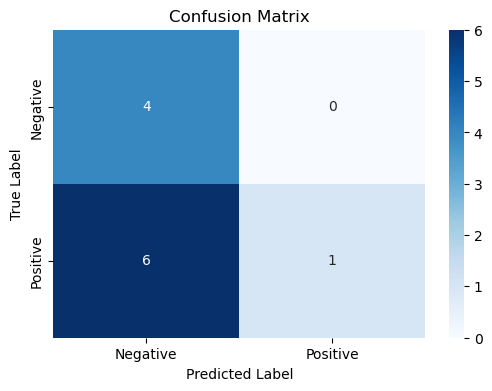

In [78]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Download necessary NLTK data files
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Load dataset
df = pd.read_csv('Edreveiw.csv')

# Display dataset information
print("Dataset Head:\n", df.head())
print("Dataset Columns:\n", df.columns)

# Define column names dynamically
TEXT_COLUMN = df.columns[0]  # Assume first column is review text
LABEL_COLUMN = df.columns[1]  # Assume second column is sentiment label

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to preprocess text
def preprocess_text(text):
    text = str(text).lower()  # Convert to lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove punctuation and special characters
    words = word_tokenize(text)  # Tokenization
    words = [word for word in words if word not in stopwords.words('english')]  # Remove stopwords
    words = [lemmatizer.lemmatize(word) for word in words]  # Lemmatization
    return ' '.join(words)

# Apply preprocessing
df['Processed_Text'] = df[TEXT_COLUMN].apply(preprocess_text)

# Convert labels to binary if necessary (1 for positive, 0 for negative)
if df[LABEL_COLUMN].dtype == 'object':
    df[LABEL_COLUMN] = df[LABEL_COLUMN].map({'positive': 1, 'negative': 0})

# Convert text into numerical format using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Processed_Text'])
y = df[LABEL_COLUMN]

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Sentiment Analysis Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", report)

# Visualizing Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
